In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')

#!pip install plotly
import plotly.graph_objs as go
import plotly.express as px 

#!pip install millify
#from millify import millify
from scipy.stats import norm

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\simran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
df=pd.read_csv('covidtwitterdata.csv')
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Account2020,NaN,NaN,2020-01-05 22:26:28,60,13,15618,False,2021-04-25 23:59:59,Bianca Andreescu forced to withdraw from Madri...,NaN,Twitter for iPhone,False
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,"M.Ed. Writer, Editor. A wonder to behold. Bann...",2019-08-10 14:26:54,142,480,12686,False,2021-04-25 23:59:56,This is such a farce after #COVID19 last year....,['COVID19'],Twitter for iPhone,False
2,اکو انق ملايو جاتي,Malaysia,Anak Watan Jati @ Tanah Melayu \nAhlul Sunnah ...,2012-06-17 02:17:24,2983,126,52316,False,2021-04-25 23:59:54,"5:58 a.m. Brazil records 71,137 new coronaviru...",NaN,Twitter for Android,False
3,इmranS,"Hyderabad, India",Indian National Congress 🇮🇳 || Member ID: TG18...,2019-05-12 23:02:31,180,508,1158,False,2021-04-25 23:59:52,@AkbarOwaisi_MIM At one point you are praying ...,NaN,Twitter for Android,False
4,Meraj Wali AFRIDI,Lucknow,Spokesman District Congres Lucknow. Member Utt...,2013-11-10 07:13:23,1650,894,7894,False,2021-04-25 23:59:51,UAE\n\nTonight we stand in solidarity with #In...,['India'],Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,NaN,"I'm Vietnamese, I live in Sai Gon\nI love soci...",2020-09-09 21:20:37,3124,788,20082,False,2021-04-24 12:43:04,"Nearly 47,000 people in 26 localities received...",NaN,Twitter Web App,False
199996,Gayathrimahes11,"Bengaluru South, India",NaN,2021-01-07 10:37:13,2,9,1,False,2021-04-24 12:43:02,Ways to fight covid19 For kids\n1. We must tea...,NaN,Twitter Web App,False
199997,Richard Cole,"Guelph, Ontario","""If you're looking to get silly, you better go...",2020-11-10 18:32:21,196,666,1150,False,2021-04-24 12:43:02,Ontario government House leader Paul Calandra ...,NaN,Twitter Web App,False
199998,JOHN WİCK,"İstanbul, Türkiye",Real death is preferable to a life without living,2020-10-11 08:44:54,461,494,213,False,2021-04-24 12:43:01,Dog really said: 😏😏😏😏😏\n\n#CHUANG2021 \n#Glaze...,"['CHUANG2021', 'GlazersOut', 'IndiaNeedsOxygen...",Twitter for iPhone,False


In [3]:
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0],df.shape[1]))

There are 200000 rows and 13 columns in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         199990 non-null  object
 1   user_location     142121 non-null  object
 2   user_description  180498 non-null  object
 3   user_created      200000 non-null  object
 4   user_followers    200000 non-null  int64 
 5   user_friends      200000 non-null  int64 
 6   user_favourites   200000 non-null  int64 
 7   user_verified     200000 non-null  bool  
 8   date              200000 non-null  object
 9   text              200000 non-null  object
 10  hashtags          55136 non-null   object
 11  source            200000 non-null  object
 12  is_retweet        200000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 17.2+ MB


In [5]:
df.isna().sum()

user_name               10
user_location        57879
user_description     19502
user_created             0
user_followers           0
user_friends             0
user_favourites          0
user_verified            0
date                     0
text                     0
hashtags            144864
source                   0
is_retweet               0
dtype: int64

In [6]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

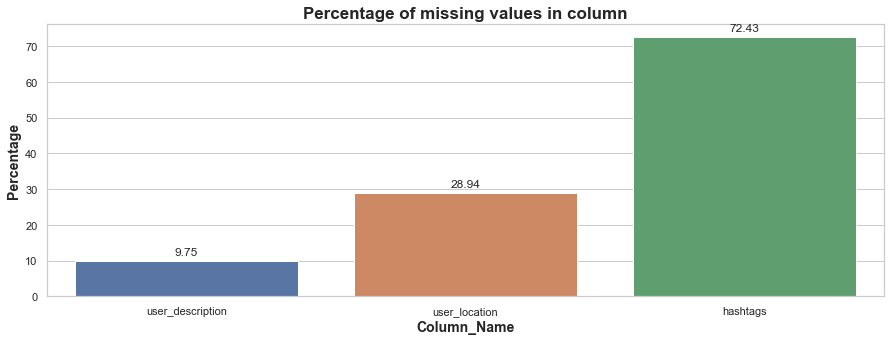

In [7]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

In [8]:
user_location_df = df["user_location"].value_counts().rename_axis("place").reset_index(name="counts")
user_location_df.head(10)

,place,counts
0,TX,5922
1,India,5594
2,"New Delhi, India",2736
3,United States,1566
4,"Los Angeles County, CA",1452
5,Canada,1443
6,"Mumbai, India",1397
7,"Gurgaon, India",1276
8,San Antonio,1100
9,"London, England",1074


In [15]:
a =  df['user_location'].drop_duplicates()
a

0                                 NaN
1                              Earth 
2                            Malaysia
3                               India
4                             Lucknow
                     ...             
199940                     Crozet, VA
199942    Camarines Sur, Philippines 
199952         Saint Charles, IL. USA
199971                    Pukhtunkhwa
199983                      Afromambo
Name: user_location, Length: 28430, dtype: object

In [14]:
df.loc[(df.user_location == 'New Delhi, India'), 'user_location'] = 'India'
df.loc[(df.user_location == 'Mumbai, India'), 'user_location'] = 'India'
df.loc[(df.user_location == 'Hyderabad, India'), 'user_location'] = 'India'
df.loc[(df.user_location == 'Gurgaon, India'), 'user_location'] = 'India'
df.loc[(df.user_location == 'Lucknow'), 'user_location'] = 'India'

In [167]:
user_location = user_location_df[user_location_df["counts"]>25].head(25)

fig = px.bar(user_location, x="place", y="counts", title="Top 25 Locations tweets originate from")
fig.show()

In [168]:
verified_df = df.query('user_verified == True').reset_index(drop=True)
top_verified_df = verified_df.loc[:,['user_name','user_location','user_followers','text']]

In [169]:
user_verified_df = top_verified_df.groupby('user_name')['user_location'].count().rename_axis("user").reset_index(name="counts").sort_values(['counts'],ascending=False)
user_verified_df.head(10)

,user,counts
2352,Hindustan Times,309
2487,IndiaToday,131
5967,Vaccine Hunters Canada,125
3127,LatestLY,99
170,ANI,94
5649,The Times Of India,93
6543,tv9gujarati,84
5581,The New Indian Express,80
3708,NDTV,78
1517,Deccan Herald,75


In [170]:
user_verified = user_verified_df[user_verified_df["counts"]>20].head(20)

fig = px.bar(user_verified, x='counts',y='user',title="Top 20 user verified tweets", orientation='h')
fig.update_yaxes(autorange="reversed")
fig.show()

In [171]:
df_hash = df.dropna()

In [172]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stop_words=set(STOPWORDS)
hashtag = " ".join(df_hash['hashtags'].astype('str'))
loc = " ".join(df['user_location'].astype('str'))

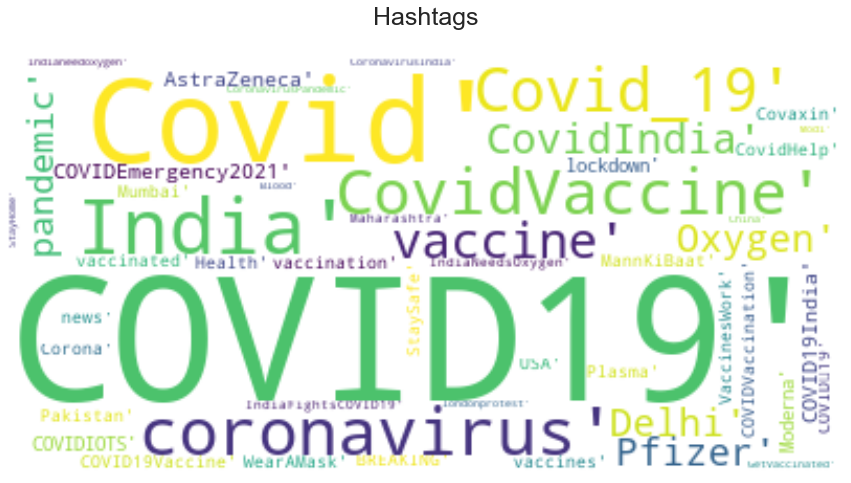

In [185]:
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="white",collocations=False, stopwords=stop_words).generate(hashtag)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Hashtags\n', fontsize=25)
plt.axis("off")
plt.show()

In [150]:
df['user_description'] = df['user_description'].fillna('unknown')
df['hashtags'] = df['hashtags'].fillna('none')
df['user_location'] = df['user_location'].fillna('world')
df.isna().sum()

user_name           10
user_location        0
user_description     0
user_created         0
user_followers       0
user_friends         0
user_favourites      0
user_verified        0
date                 0
text                 0
hashtags             0
source               0
is_retweet           0
dtype: int64

In [132]:
def wordcloud(string,title,color):
    wc = WordCloud(background_color=color, width=1200,height=600,mask=None,random_state=1,
                   max_font_size=200,stopwords=stop_words,collocations=False).generate(string)
    fig=plt.figure(figsize=(20,8))
    plt.axis('off')
    plt.title('--- WordCloud for {} --- '.format(title),weight='bold', size=30)
    plt.imshow(wc)

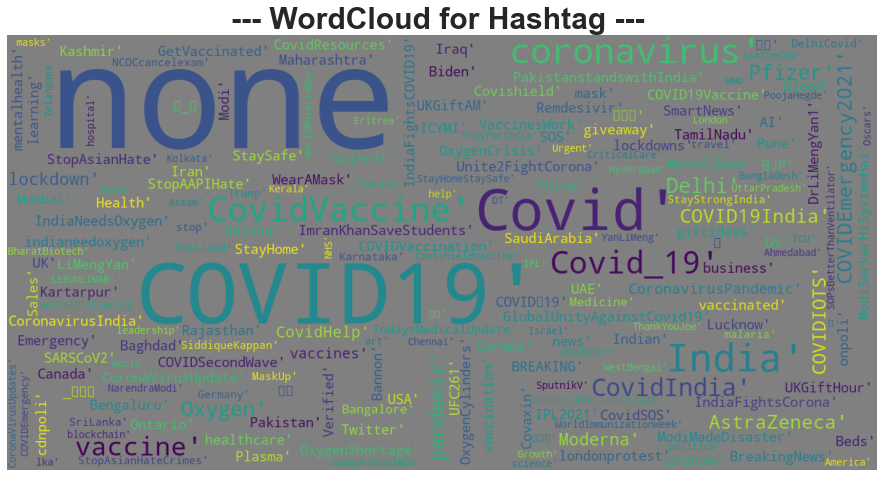

In [134]:
wordcloud(hashtag,'Hashtag','grey')

In [71]:
df['user_location'].value_counts()[0:10]

world                     57884
TX                         5922
India                      5594
New Delhi, India           2736
United States              1566
Los Angeles County, CA     1452
Canada                     1443
Mumbai, India              1397
Gurgaon, India             1276
San Antonio                1100
Name: user_location, dtype: int64

In [72]:
columns=['user_name','user_location','date','text']
df1 = df[columns]
df1

,user_name,user_location,date,text
0,Account2020,world,2021-04-25 23:59:59,Bianca Andreescu forced to withdraw from Madri...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25 23:59:56,This is such a farce after #COVID19 last year....
2,اکو انق ملايو جاتي,Malaysia,2021-04-25 23:59:54,"5:58 a.m. Brazil records 71,137 new coronaviru..."
3,इmranS,"Hyderabad, India",2021-04-25 23:59:52,@AkbarOwaisi_MIM At one point you are praying ...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25 23:59:51,UAE\n\nTonight we stand in solidarity with #In...
...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24 12:43:04,"Nearly 47,000 people in 26 localities received..."
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24 12:43:02,Ways to fight covid19 For kids\n1. We must tea...
199997,Richard Cole,"Guelph, Ontario",2021-04-24 12:43:02,Ontario government House leader Paul Calandra ...
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24 12:43:01,Dog really said: 😏😏😏😏😏\n\n#CHUANG2021 \n#Glaze...


In [73]:
df1.date=pd.to_datetime(df1.date).dt.date
df1.head()

C:\Users\simran\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,user_location,date,text
0,Account2020,world,2021-04-25,Bianca Andreescu forced to withdraw from Madri...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,This is such a farce after #COVID19 last year....
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,"5:58 a.m. Brazil records 71,137 new coronaviru..."
3,इmranS,"Hyderabad, India",2021-04-25,@AkbarOwaisi_MIM At one point you are praying ...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,UAE\n\nTonight we stand in solidarity with #In...


In [74]:
def clean_text(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df1['text'] = df1['text'].apply(lambda x: clean_text(x))
display(df1)

<ipython-input-74-f66de0207a4d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,user_location,date,text
0,Account2020,world,2021-04-25,Bianca Andreescu forced to withdraw from Madri...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,This is such a farce after last year We are o...
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,am Brazil records new coronavirus cases and ...
3,इmranS,"Hyderabad, India",2021-04-25,AkbarOwaisiMIM At one point you are praying Is...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,UAETonight we stand in solidarity with India 🇮...
...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24,Nearly people in localities received shots o...
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24,Ways to fight For We must teach our children...
199997,Richard Cole,"Guelph, Ontario",2021-04-24,Ontario government House leader Paul Calandra ...
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24,Dog really said 😏😏😏😏😏 GlazersOut IndiaNeedsOxy...


In [75]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df1['text'] = df1['text'].apply(lambda x: remove_emoji(x))
display(df1)

<ipython-input-75-bb8c8b1074da>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,user_location,date,text
0,Account2020,world,2021-04-25,Bianca Andreescu forced to withdraw from Madri...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,This is such a farce after last year We are o...
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,am Brazil records new coronavirus cases and ...
3,इmranS,"Hyderabad, India",2021-04-25,AkbarOwaisiMIM At one point you are praying Is...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,UAETonight we stand in solidarity with India ...
...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24,Nearly people in localities received shots o...
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24,Ways to fight For We must teach our children...
199997,Richard Cole,"Guelph, Ontario",2021-04-24,Ontario government House leader Paul Calandra ...
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24,Dog really said GlazersOut IndiaNeedsOxygen ...


In [76]:
texts=df1.text
texts.head()

0    Bianca Andreescu forced to withdraw from Madri...
1    This is such a farce after  last year We are o...
2     am Brazil records  new coronavirus cases and ...
3    AkbarOwaisiMIM At one point you are praying Is...
4    UAETonight we stand in solidarity with India  ...
Name: text, dtype: object

In [77]:
to_lower=lambda x: x.lower()
texts=texts.apply(to_lower)
texts.head()

0    bianca andreescu forced to withdraw from madri...
1    this is such a farce after  last year we are o...
2     am brazil records  new coronavirus cases and ...
3    akbarowaisimim at one point you are praying is...
4    uaetonight we stand in solidarity with india  ...
Name: text, dtype: object

In [122]:
more_words=['say','going','like','U','u', 'http','https','url','today','hey','amp','...','apr','zip','pm']
stop_words=set(stopwords.words('english')) #nltk package
stop_words.update(more_words)

remove_words=lambda x: ' '.join([word for word in x.split() if word not in stop_words]) #.join is from package string
texts=r=texts.apply(remove_words)
texts.head()

0    bianca andreescu forced withdraw madrid open t...
1     farce last year recognizing handful talent cont…
2    brazil records new coronavirus cases additiona...
3    akbarowaisimim one point praying iss wabah ka ...
4    uaetonight stand solidarity india prominent la...
Name: text, dtype: object

In [124]:
words_list=[word for line in texts for word in line.split()]
word_counts=Counter(words_list).most_common(50)
word_df=pd.DataFrame(word_counts)
word_df.columns=['word','frq']
display(word_df.head(7))
px.bar(word_df,x='word',y='frq',title='Most common words',
       labels={'word': 'Words','frq':'Frequency'})

,word,frq
0,new,25420
1,covid,18695
2,india,17067
3,vaccine,16903
4,available,13655
5,cases,12782
6,appointments,12699


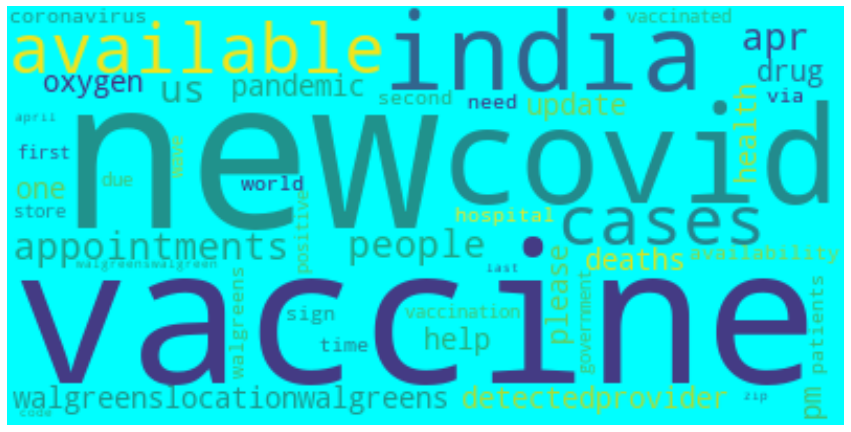

In [31]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(x for x in word_df.word)
wordcloud = WordCloud(max_font_size=100, max_words=50, background_color="aqua").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [80]:
display(df1)
df1.text=texts
display(df1)

,user_name,user_location,date,text
0,Account2020,world,2021-04-25,Bianca Andreescu forced to withdraw from Madri...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,This is such a farce after last year We are o...
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,am Brazil records new coronavirus cases and ...
3,इmranS,"Hyderabad, India",2021-04-25,AkbarOwaisiMIM At one point you are praying Is...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,UAETonight we stand in solidarity with India ...
...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24,Nearly people in localities received shots o...
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24,Ways to fight For We must teach our children...
199997,Richard Cole,"Guelph, Ontario",2021-04-24,Ontario government House leader Paul Calandra ...
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24,Dog really said GlazersOut IndiaNeedsOxygen ...


C:\Users\simran\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,user_location,date,text
0,Account2020,world,2021-04-25,bianca andreescu forced withdraw madrid open t...
1,┋𝔇𝔞𝔫𝔞’𝔰 𝔐𝔲𝔰𝔢┋,Earth,2021-04-25,farce last year recognizing handful talent cont…
2,اکو انق ملايو جاتي,Malaysia,2021-04-25,brazil records new coronavirus cases additiona...
3,इmranS,"Hyderabad, India",2021-04-25,akbarowaisimim one point praying iss wabah ka ...
4,Meraj Wali AFRIDI,Lucknow,2021-04-25,uaetonight stand solidarity india prominent la...
...,...,...,...,...
199995,Olala(金龙) 🇻🇳🇨🇳🇷🇺,world,2021-04-24,nearly people localities received shots april ...
199996,Gayathrimahes11,"Bengaluru South, India",2021-04-24,ways fight must teach children right way right...
199997,Richard Cole,"Guelph, Ontario",2021-04-24,ontario government house leader paul calandra ...
199998,JOHN WİCK,"İstanbul, Türkiye",2021-04-24,dog really said glazersout indianeedsoxygen co...


In [35]:
df1.to_csv("clean_data.csv", index = False)

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_unigram(texts, 100)
for word, freq in common_words:
    print(word, freq)

new 25566
covid 19741
india 18331
vaccine 17332
available 13692
cases 12977
appointments 12709
people 11089
detectedprovider 7006
walgreenslocationwalgreens 6144
drug 6036
oxygen 5984
deaths 5945
pandemic 5695
help 5619
update 5361
vaccines 5146
health 5061
coronavirus 4774
availability 3875
need 3864
news 3853
second 3786
world 3742
hospital 3733
patients 3626
sign 3587
time 3559
vaccination 3555
government 3540
wave 3478
walgreens 3475
vaccinated 3418
store 3285
positive 3214
walgreenswalgreen 3093
april 3022
code 3001
day 2957
amid 2902
country 2780
delhi 2683
cvs 2673
crisis 2573
know 2524
walgreen 2491
indian 2461
year 2419
state 2323
govt 2299
dont 2273
situation 2267
says 2256
got 2222
surge 2208
doses 2196
free 2144
fight 2128
days 2116
noneurl 2104
death 2094
group 2090
virus 2084
lockdown 2082
support 2066
reports 2064
reported 2027
getting 2016
hospitals 2008
covidvaccine 1999
home 1997
minister 1973
medical 1945
spread 1927
mask 1891
uk 1838
good 1822
make 1808
daily 1800
m

In [126]:
unigrams = pd.DataFrame(common_words, columns=['topic','count']).sort_values(['count'])
fig = px.bar(unigrams.tail(20), x='count',y='topic')
fig.show()

In [127]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_unigram(texts, 100)
for word, freq in common_words2:
    print(word, freq)

available appointments 7011
new available 7008
appointments detectedprovider 7006
detectedprovider walgreenslocationwalgreens 6144
appointments available 4923
new cases 3611
new availability 3374
vaccine appointments 3233
available walgreens 3114
drug store 3113
availability walgreenswalgreen 3093
walgreenswalgreen drug 3088
sign code 2921
walgreen drug 2491
second wave 2005
siddique kappan 1540
cases deaths 1341
update walgreen 1254
drug storewashington 1237
new appointments 1201
available walgreen 1188
new cvs 1186
walgreens chicago 1179
chicago sign 1179
cvs group 1140
reports new 1035
new availabilities 1007
amid fear 984
fear second 980
chief minister 937
tested positive 922
walgreenslocationwalgreens san 879
covid vaccine 876
detectedprovider cvs 845
cvs pharmacycity 845
fully vaccinated 836
release siddique 813
intervene release 812
vijayanpinarayi intervene 811
kerala chief 807
minister vijayanpinarayi 805
kappan facing 794
vaccine doses 791
facing unjust 790
public health 720


In [129]:
bigrams = pd.DataFrame(common_words2, columns=['bigram','count']).sort_values(['count'])
fig = px.bar(bigrams.tail(20), x='count',y='bigram')
fig.show()

In [120]:
def get_top_n_unigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_unigram(texts, 100)
for word, freq in common_words3:
    print(word, freq)

new available appointments 7006
available appointments detectedprovider 7006
appointments detectedprovider walgreenslocationwalgreens 6144
vaccine appointments available 3176
appointments available walgreens 3104
new availability walgreenswalgreen 3093
availability walgreenswalgreen drug 3088
walgreenswalgreen drug store 3088
apr sign zip 2925
sign zip code 2921
apr apr sign 2817
noneurl apr pm 1327
update walgreen drug 1254
walgreen drug storewashington 1237
drug storewashington apr 1237
new appointments available 1200
appointments available walgreen 1188
available walgreen drug 1188
available walgreens chicago 1179
walgreens chicago apr 1179
new cvs group 1140
chicago apr apr 1088
amid fear second 975
fear second wave 970
detectedprovider walgreenslocationwalgreens san 879
appointments detectedprovider cvs 845
detectedprovider cvs pharmacycity 845
intervene release siddique 811
vijayanpinarayi intervene release 810
release siddique kappan 810
kerala chief minister 806
chief minister 

In [121]:
trigrams = pd.DataFrame(common_words3, columns=['topic','count']).sort_values(['count'])
fig = px.bar(trigrams.tail(20), x='count',y='topic')
fig.show()